**Predict Likeability of Songs**


**Problem Description**

We have a dataset of songs with various attributes. A song which is labelled '1' means the person likes it whereas a song which is labelled '0' means that the person doesn't like the song. Therefore our final aim is to build a classifier that when a song comes up, the person would like that song or not.


**The Dataset**

One song is featured in each row. There are 16 columns in the dataset.
The dataset which we have takes into acccount 13 song attributes other than the name and the artist of the song. Also there is a column called target in the dataset which serves as the label of the song.

The 13 attributes are -

1. Acousticness
2. Danceability
3. Duration
4. Energy
5. Instrumentalness
6. Liveness
7. Loudness
8. Speechiness
9. Tempo
10. Valence
11. Time Signature
12. Mode
13. Key

In [ ]:
!gdown --id 13z3LGfNLFZFrzD64qBb6INmpNSrymdUJ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=13z3LGfNLFZFrzD64qBb6INmpNSrymdUJ
To: /content/data.csv
100% 223k/223k [00:00<00:00, 84.1MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
data

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1             0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2             0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3             0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4             0.512000    5    0.4390   -11.648     0       0.0694  174.004   
...                ...  ...       ...       ...   ...          ...      ...   
2012          0.002690    1    0.1290    -3.501     1       0.3330   74.976   
2013          0.001670    1    0.0528    -2.663     1       0.1310  110.041   
2014          0.003990    0    0.2140    -2.467     1       0.1070  150.082   
2015          0.677000    1    0.0913    -2.735     1       0.1330  150.011   
2016          0.000039    9    0.2180    -6.221     1       0.1410  190.013   

      time_signature  valence  target                            song_title  \
0                4.0    0.286       1                              Mask Off   
1                4.0    0.588       1                               Redbone   
2                4.0    0.173       1                          Xanny Family   
3                4.0    0.230       1                        Master Of None   
4                4.0    0.904       1                        Parallel Lines   
...              ...      ...     ...                                   ...   
2012             4.0    0.211       0   Like A Bitch - Kill The Noise Remix   
2013             4.0    0.867       0                                 Candy   
2014             4.0    0.470       0  Habit - Dack Janiels & Wenzday Remix   
2015             4.0    0.623       0                         First Contact   
2016             4.0    0.402       0                    I Wanna Get Better   

                artist  
0               Future  
1     Childish Gambino  
2               Future  
3          Beach House  
4          Junior Boys  
...                ...  
2012    Kill The Noise  
2013    Dillon Francis  
2014          Rain Man  
2015        Twin Moons  
2016         Bleachers  

[2017 rows x 17 columns]

In [ ]:
#removed the index
data.drop("Unnamed: 0", axis = 1, inplace = True)


In [ ]:
data.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0102         0.833       204600   0.434          0.021900    2   
1        0.1990         0.743       326933   0.359          0.006110    1   
2        0.0344         0.838       185707   0.412          0.000234    2   
3        0.6040         0.494       199413   0.338          0.510000    5   
4        0.1800         0.678       392893   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1    0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2    0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3    0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4    0.4390   -11.648     0       0.0694  174.004             4.0    0.904   

   target      song_title            artist  
0       1        Mask Off            Future  
1       1         Redbone  Childish Gambino  
2       1    Xanny Family            Future  
3       1  Master Of None       Beach House  
4       1  Parallel Lines       Junior Boys

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [ ]:
data.duplicated().value_counts()

False    2012
True        5
dtype: int64

In [ ]:
#removed duplicate rows

data.drop_duplicates(inplace = True)
data.duplicated().value_counts()

False    2012
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2012 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2012 non-null   float64
 1   danceability      2012 non-null   float64
 2   duration_ms       2012 non-null   int64  
 3   energy            2012 non-null   float64
 4   instrumentalness  2012 non-null   float64
 5   key               2012 non-null   int64  
 6   liveness          2012 non-null   float64
 7   loudness          2012 non-null   float64
 8   mode              2012 non-null   int64  
 9   speechiness       2012 non-null   float64
 10  tempo             2012 non-null   float64
 11  time_signature    2012 non-null   float64
 12  valence           2012 non-null   float64
 13  target            2012 non-null   int64  
 14  song_title        2012 non-null   object 
 15  artist            2012 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [ ]:
data.nunique(axis =0)

acousticness        1394
danceability         632
duration_ms         1921
energy               719
instrumentalness    1107
key                   12
liveness             793
loudness            1808
mode                   2
speechiness          792
tempo               1919
time_signature         4
valence              853
target                 2
song_title          1956
artist              1343
dtype: int64

In [ ]:
#categorical columns
cat_cols = list(data.select_dtypes('object').columns)

#discrete columns
dis_cols = ['key', 'mode', 'time_signature', 'target']

#continuous columns
cont_cols = list(data.select_dtypes('float64').columns)
cont_cols.append('duration_ms')
cont_cols.remove('time_signature')

In [ ]:
print(cat_cols)
print(dis_cols)
print(cont_cols)

['song_title', 'artist']
['key', 'mode', 'time_signature', 'target']
['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms']


In [ ]:
data[cont_cols].describe()

acousticness  danceability       energy  instrumentalness     liveness  \
count   2012.000000   2012.000000  2012.000000       2012.000000  2012.000000   
mean       0.187513      0.618450     0.681840          0.132980     0.190816   
std        0.259691      0.161003     0.210255          0.272967     0.155571   
min        0.000003      0.122000     0.014800          0.000000     0.018800   
25%        0.009590      0.514000     0.563750          0.000000     0.092200   
50%        0.063500      0.631000     0.715500          0.000074     0.126500   
75%        0.265000      0.738000     0.846000          0.053925     0.246250   
max        0.995000      0.984000     0.998000          0.976000     0.969000   

          loudness  speechiness        tempo      valence   duration_ms  
count  2012.000000  2012.000000  2012.000000  2012.000000  2.012000e+03  
mean     -7.076750     0.092568   121.602351     0.497278  2.462608e+05  
std       3.756502     0.089615    26.687988     0.247167  8.202146e+04  
min     -33.097000     0.023100    47.859000     0.034800  1.604200e+04  
25%      -8.392250     0.037500   100.164000     0.296000  2.000045e+05  
50%      -6.247500     0.054900   121.407000     0.493000  2.291200e+05  
75%      -4.744000     0.108000   137.695250     0.692000  2.703565e+05  
max      -0.307000     0.816000   219.331000     0.992000  1.004627e+06

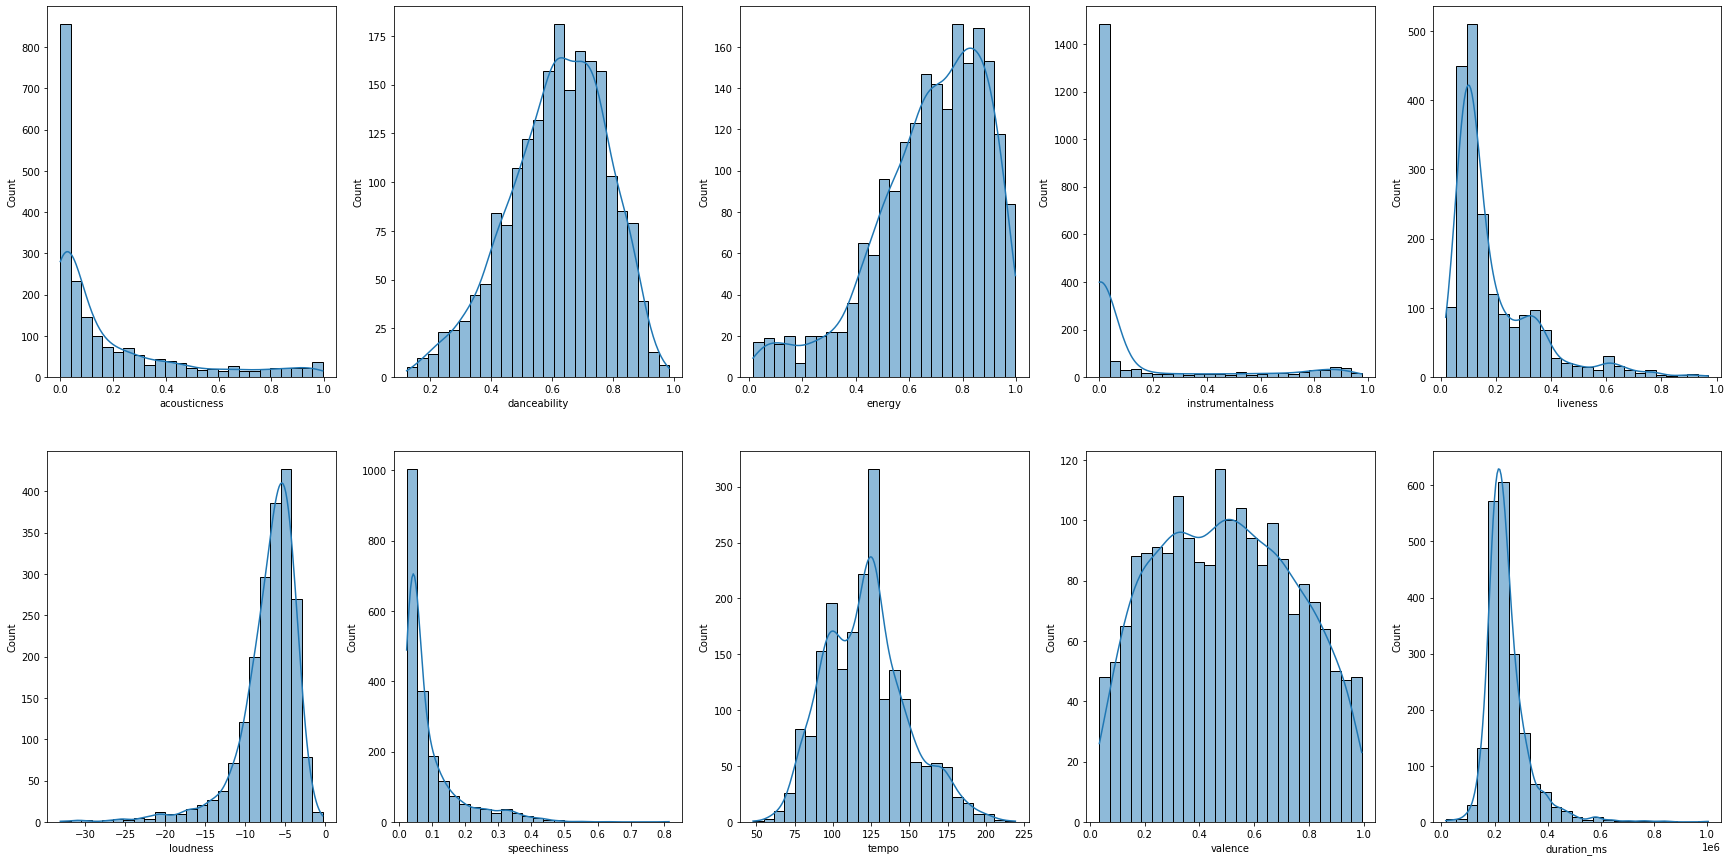

In [ ]:
fig, axes = plt.subplots(2, 5,figsize=(30,15))
axes = axes.flatten()
ax_no = 0
for col in cont_cols:
    sns.histplot(data = data, x=col, bins=25, kde=True, ax = axes[ax_no])
    ax_no += 1

Insights of above graphs


*   Data for acousticness, instrumentainess, liveness,speechness, loudness and duration_ms are highly skewed

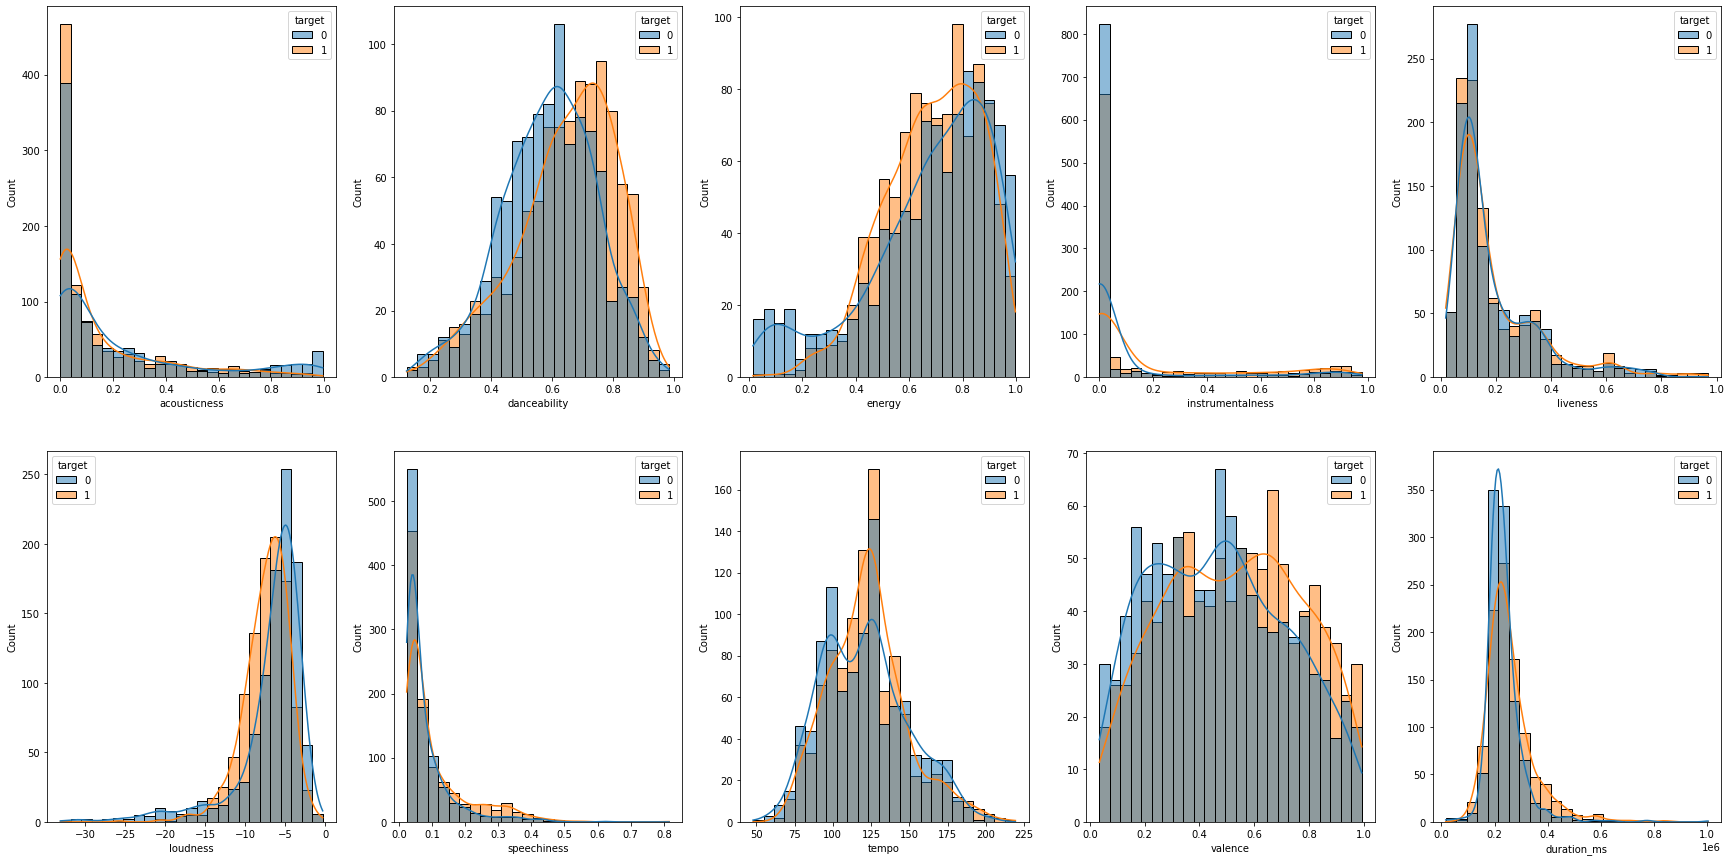

In [ ]:
fig, axes = plt.subplots(2, 5,figsize=(30,15))
axes = axes.flatten()
ax_no = 0
for col in cont_cols:
    sns.histplot(data = data, x=col, hue = 'target', bins=25, kde=True, ax = axes[ax_no])
    ax_no += 1

**data distribution with target column**


*   High Danceability and valence index songs are more likely to get selected
*   Medium loudness, tempo and energy songs are also more likeable
*   High acoustic songs are not selected in general though very few data is available for that
*   For speechness, very low speechness data are a bit avoided and average value data is selected

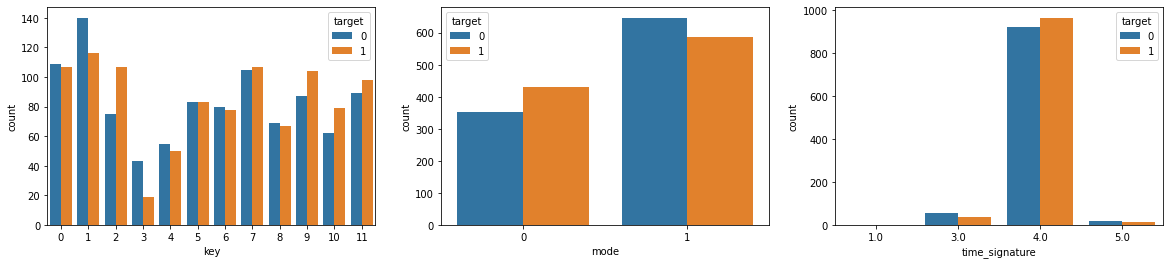

In [ ]:
fig, axes = plt.subplots(1, 3,figsize=(20,4))
axes = axes.flatten()
ax_no = 0
for col in dis_cols:
    if col != 'target':
      sns.countplot(data = data, x=col, hue = 'target', ax = axes[ax_no])
      ax_no += 1

Given data is quite well distributed between the two target values for the discrete attributes

KeyboardInterrupt: ignored

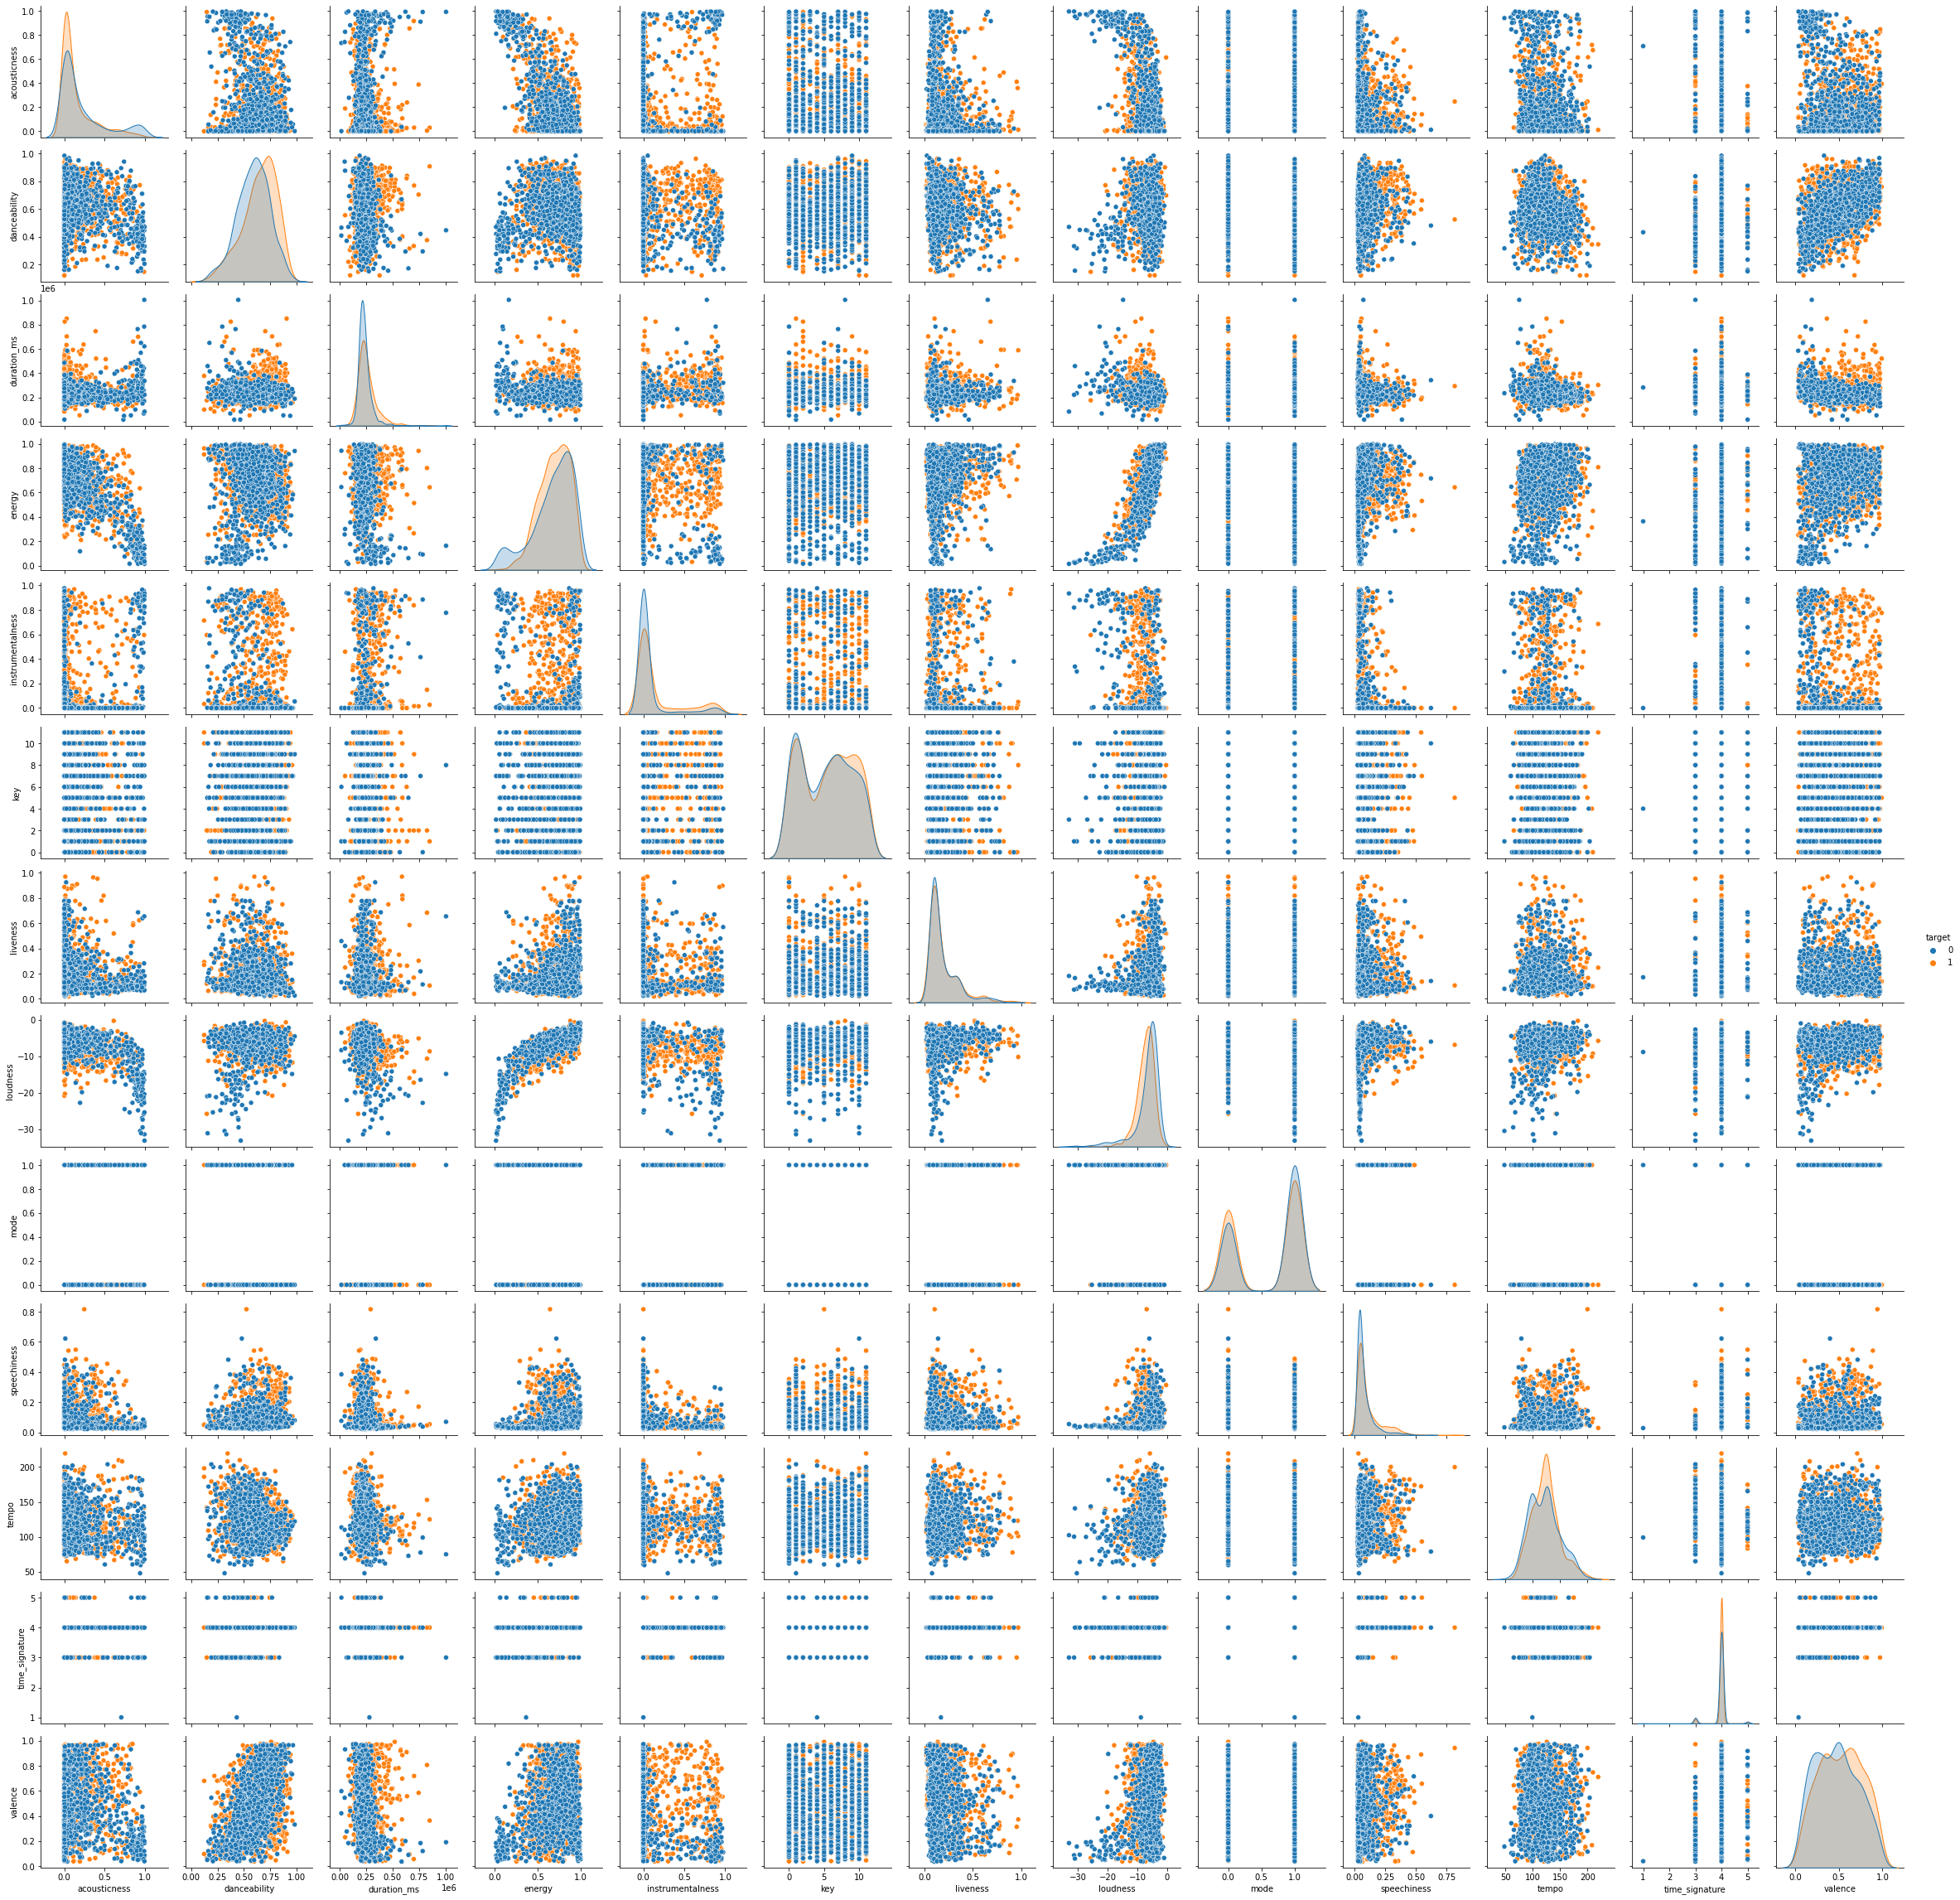

In [ ]:
sns.pairplot(data = data, hue = 'target')

**Insights**


*   High acoustic and low loudness songs are not likeable
*   Medium acoustic songs with high instrumentation are generally selected, very high and very low acoustics are not selected
*   large duration songs with high danceability are selected
*   high instrumentation and high danceability songs are also selected
*   medium energy and high instrumentation songs are selected
*   high instrumentation and high valence are selected
*   medium speechiness and tempo songs are likeable

Text(0.5, 1.0, 'Negative Correlations')

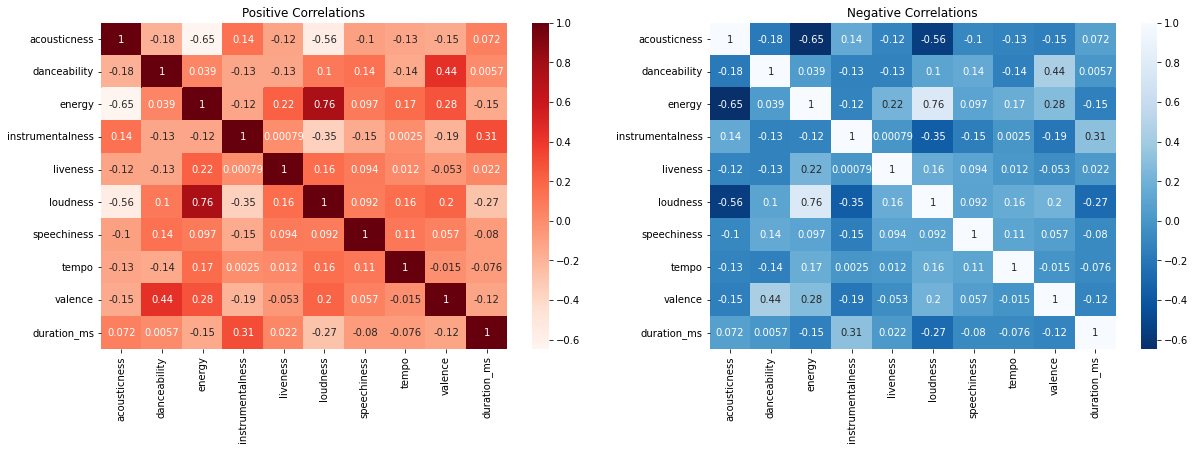

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,6))
corr = data[cont_cols].corr()
sns.heatmap(data= corr, annot=True, cmap ='Reds', ax = axes[0])
axes[0].set_title('Positive Correlations')
sns.heatmap(data= corr, annot=True, cmap ='Blues_r', ax = axes[1])
axes[1].set_title('Negative Correlations')

Text(0.5, 0.98, 'Correlation Analysis')

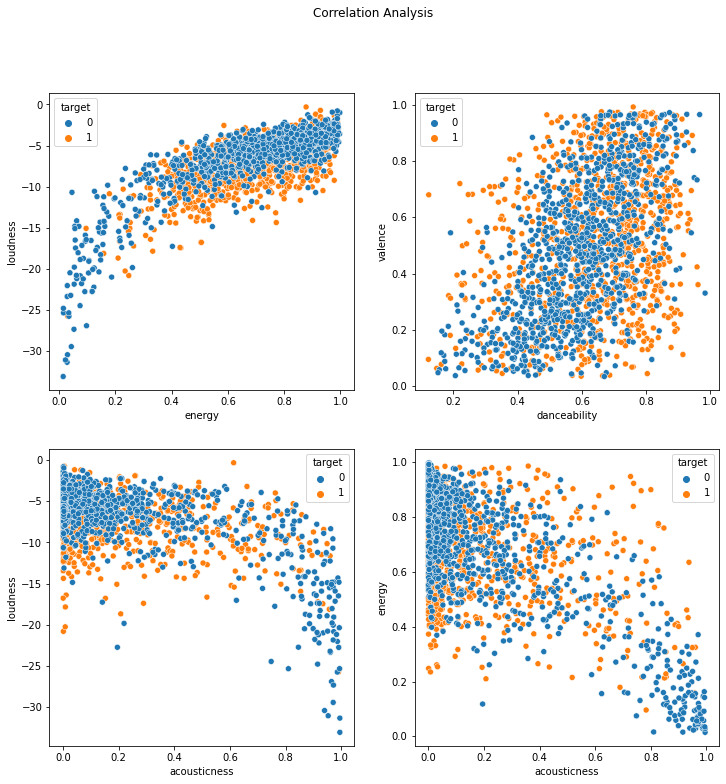

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
axes = axes.flatten()
sns.scatterplot(data= data, x= 'energy', y= 'loudness', ax = axes[0], hue ='target')
sns.scatterplot(data= data, x= 'danceability', y= 'valence', ax = axes[1], hue ='target')
sns.scatterplot(data= data, x= 'acousticness', y= 'loudness', ax = axes[2], hue ='target')
sns.scatterplot(data= data, x= 'acousticness', y= 'energy', ax = axes[3], hue ='target')
fig.suptitle('Correlation Analysis')

In [ ]:
top_artist = data.artist.value_counts().head(16)
top_artist

Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Crystal Castles     9
FIDLAR              9
Future              8
Michael Jackson     8
*NSYNC              8
Big Time Rush       8
Kanye West          8
Demi Lovato         8
Kina Grannis        8
Fall Out Boy        8
Skrillex            8
Name: artist, dtype: int64

Text(0.5, 1.0, 'Artists with most songs')

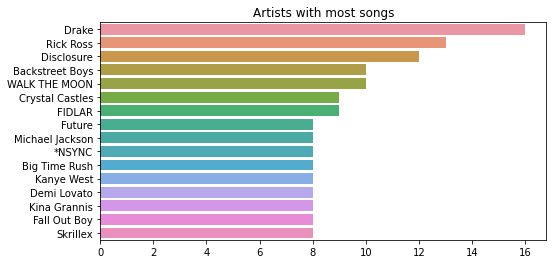

In [ ]:
fig , axes = plt.subplots(1,1,figsize=(8,4))
sns.barplot(x = top_artist.values, y= top_artist.index, ax = axes)
plt.title('Artists with most songs')

In [ ]:
songs_count = data.song_title.value_counts().value_counts()
songs_count

1    1900
2      56
Name: song_title, dtype: int64

In [ ]:
loudest = data[['loudness', 'song_title', 'artist', 'target']].sort_values(by="loudness",ascending=True).head(15)
loudest

loudness                                         song_title  \
1594   -33.097            Lyric Pieces, Book I Op. 12: I. Arietta   
1596   -31.367            8 Fantasiestücke, Op.12 : 1. Des Abends   
1598   -31.082  Piano Quartet in E flat, Op.47: 3. Andante can...   
1531   -30.447          I Was So Young, and You Were So Beautiful   
1549   -29.460                                            Eleanor   
1571   -27.350                   I Got It Bad And That Ain't Good   
1541   -26.924                                  Two Sleepy People   
1546   -25.766                                     Almas vaggvisa   
817    -25.756  Mozart: Requiem in D Minor, K. 626: VIII. Lacr...   
1537   -25.358                                      Blue in Green   
1876   -25.351           Nocturne No.1 In B Flat Minor, Op.9 No.1   
1595   -24.801  String Quartet No. 4 in C Major, D. 46: II. An...   
1555   -24.477                                     The Man I Love   
1545   -23.363                               Blue and Sentimental   
1554   -23.230                                 Where Do You Start   

                    artist  target  
1594          Edvard Grieg       0  
1596       Robert Schumann       0  
1598       Robert Schumann       0  
1531          Bill Charlap       0  
1549            Hank Jones       0  
1571   Oscar Peterson Trio       0  
1541        Marcus Gilmore       0  
1546     Jan Lundgren Trio       0  
817   Nikolaus Harnoncourt       1  
1537           Miles Davis       0  
1876       Frédéric Chopin       0  
1595        Franz Schubert       0  
1555        Marcus Roberts       0  
1545           Julian Dash       0  
1554     Brad Mehldau Trio       0

Text(0.5, 1.0, 'Most loud songs')

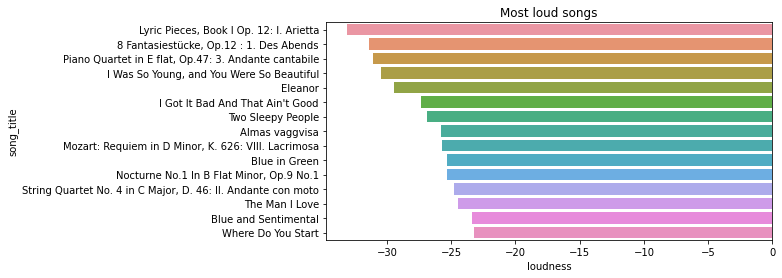

In [ ]:
fig , axes = plt.subplots(1,1,figsize=(8,4))
sns.barplot(x = loudest.loudness, y= loudest.song_title, ax = axes)
plt.title('Most loud songs')

In [ ]:
top_instrumental=data[['instrumentalness','song_title','artist', 'target']].sort_values(ascending=False,by='instrumentalness').head(10)
top_instrumental['top_artist'] = ['yes' if artist in top_artist.index else 'no' for artist in top_instrumental['artist']]
top_instrumental['loudeness'] = ['yes' if song in loudest.song_title else 'no' for song in top_instrumental['song_title']]
top_instrumental

instrumentalness                            song_title  \
1313             0.976                       Senseless Order   
271              0.968  So Destroyed (channeling Rage Peace)   
1575             0.964             A Hundred Dreams from Now   
1619             0.958                                 Raven   
725              0.957                     Strandbar (disko)   
1546             0.956                        Almas vaggvisa   
1322             0.955                            Pitchblack   
1349             0.954                       Prismatic Abyss   
1661             0.954                               Yebisah   
121              0.952                        Chasing Heaven   

                        artist  target top_artist loudeness  
1313        Signs of the Swarm       0         no        no  
271                Prince Rama       1         no        no  
1575                Ray Bryant       0         no        no  
1619             John Dahlbäck       0         no        no  
725                 Todd Terje       1         no        no  
1546         Jan Lundgren Trio       0         no        no  
1322  Walking Dead On Broadway       0         no        no  
1349           Aversions Crown       0         no        no  
1661               Mark Knight       0         no        no  
121                 Bassnectar       1         no        no

Text(0.5, 1.0, 'Most instrumental songs')

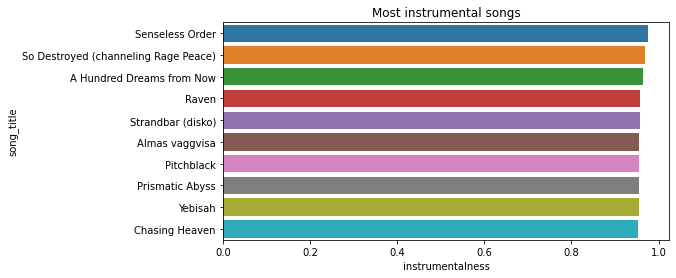

In [ ]:
fig , axes = plt.subplots(1,1,figsize=(8,4))
sns.barplot(x = top_instrumental.instrumentalness, y= top_instrumental.song_title, ax = axes)
plt.title('Most instrumental songs')

In [ ]:
danceable = data[['danceability', 'song_title', 'artist', 'target']].sort_values(by="danceability",ascending=True).head(20)
danceable

danceability                                         song_title  \
729          0.122                                         Bumpy Road   
532          0.123                                    Wake Bake Skate   
817          0.148  Mozart: Requiem in D Minor, K. 626: VIII. Lacr...   
1600         0.152         Trio Sonata in G Major, Wq. 144: I. Adagio   
1598         0.156  Piano Quartet in E flat, Op.47: 3. Andante can...   
1348         0.162               Be My Valentine (feat. Dickie Allen)   
522          0.162                                              Outro   
1464         0.164                                         Right Here   
1313         0.170                                    Senseless Order   
1306         0.173                                               Ruin   
1602         0.173  String Quintet in C Major, Op. 29: II. Adagio ...   
1356         0.176  Skrillex Orchestral Suite By Varien - Bonus Track   
1616         0.184                                                You   
338          0.185                                        I'm a Dildo   
192          0.190                                      Rocking Chair   
1960         0.191                                         Puppy Love   
801          0.191                                Drifting In And Out   
1876         0.206           Nocturne No.1 In B Flat Minor, Op.9 No.1   
445          0.207                                     Eyes Be Closed   
1339         0.209                               The Shaping Sickness   

                         artist  target  
729            Destruction Unit       1  
532                      FIDLAR       1  
817        Nikolaus Harnoncourt       1  
1600  Carl Philipp Emanuel Bach       0  
1598            Robert Schumann       0  
1348                     Brojob       0  
522                         M83       1  
1464              Keys N Krates       0  
1313         Signs of the Swarm       0  
1306        Altered Perceptions       0  
1602       Ludwig van Beethoven       0  
1356                   Skrillex       0  
1616                   Galantis       0  
338                  No Parents       1  
192               The Districts       1  
1960               Donny Osmond       0  
801              Porcelain Raft       1  
1876            Frédéric Chopin       0  
445                  Washed Out       1  
1339           Shadow of Intent       0

Text(0.5, 1.0, 'Most danceable songs')

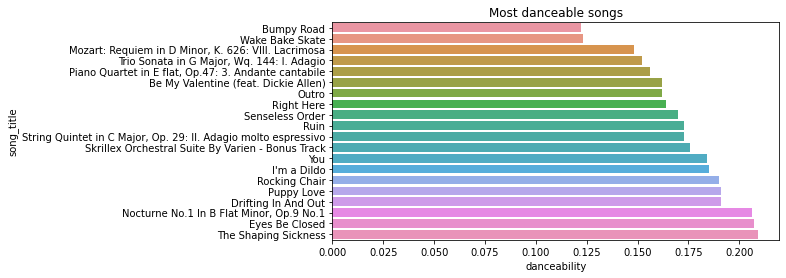

In [ ]:
fig , axes = plt.subplots(1,1,figsize=(8,4))
sns.barplot(x = danceable.danceability, y= danceable.song_title, ax = axes)
plt.title('Most danceable songs')

In [ ]:
from sklearn.preprocessing import LabelEncoder
data[cat_cols] = data[cat_cols].apply(LabelEncoder().fit_transform)
data.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0102         0.833       204600   0.434          0.021900    2   
1        0.1990         0.743       326933   0.359          0.006110    1   
2        0.0344         0.838       185707   0.412          0.000234    2   
3        0.6040         0.494       199413   0.338          0.510000    5   
4        0.1800         0.678       392893   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1    0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2    0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3    0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4    0.4390   -11.648     0       0.0694  174.004             4.0    0.904   

   target  song_title  artist  
0       1        1043     449  
1       1        1334     222  
2       1        1906     449  
3       1        1044      95  
4       1        1243     628

Class Labels: target

Interval: acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness,valence

Time: duration_ms

Numerical: tempo

Ordinal: key, time_signature

Binary: mode

String: song_title & artist


We have observed that numerous aspects are comparable.
For instance, instrumentalness is a criterion used to determine if a piece of music is instrumental or not. Additionally, vocable speechiness is employed to gauge the music. The music kind is determined using both characteristics. As a result, these two features are comparable. The properties of danceability and energy are also utilised to determine whether or not a piece of music is energetic.

Conclusion:


SpeechinessMusic produces a different outcome with an energetic group. The average mean values of both features are greater than half. 61% for danceability and 68% for energetic characteristics, respectively. Therefore, we choose to include these 2 features in the models.

It is clear that the majority of the music is speed music because the average mean tempo is 120. Key features then reveal the overall key of the piece. According to normal pitch notation, the majority of the songs are in the concert F major, number 5.



This characteristic, known as mode, that lets listeners know whether the music is in a major or minor key. Major Key denotes the use of the major scale in the song.

Nearly 61% of the time, the description result indicates that the music is in a major key.



The features known as time siganture are used to specify the number of beats in a measure. We can observe that the feature's average mean is 3.968, which is almost 4.

We can infer from the music's time signature that half of it is in 4/4.



The environment aspect is crucial in adjusting the user's musical preferences.

Additionally, both the loudness and acoustical qualities perform poorly. Having only 17% and 19% of the mean average value. However, only 25% of music is recorded live, while 92% of all music is.



Loudness is a feature of the music's quality, according to the documentation the user provides. range between -60dB and 0. The distribution appears to be uniform in appearance.

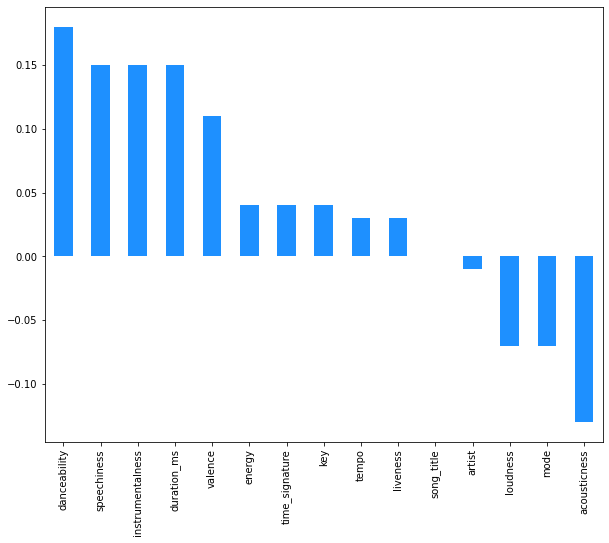

In [ ]:
ax = round(data.corr()['target'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar' ,color='dodgerblue' , figsize = (10,8))
plt.show()

In [ ]:
data = data.drop(['song_title','artist'], axis = 1)
print('The Dimension of the dataset after drop the features:', data.shape)

The Dimension of the dataset after drop the features: (2012, 14)


In [ ]:
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.neighbors import KNeighborsClassifier #KNN

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [ ]:
X_train = data.drop('target', axis = 1)
Y_train = data['target']

#Split the X_Train & Y_train into training set & testing set by train_test_split function
x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train,test_size = 0.2, random_state = 0)

In [ ]:
log = LogisticRegression()
log.fit(x_train,y_train)
log_y_pred = log.predict(x_test)
log_result_train = round(log.score(x_train,y_train)*100,2)

#ii. Gaussian Naive Bayes
NB = GaussianNB()
NB.fit(x_train,y_train)
NB_y_pred = NB.predict(x_test)
NB_result_train = round(NB.score(x_train,y_train)*100,2)

#iii. Decision Tree
DT = DecisionTreeClassifier(max_depth = 4)
DT.fit(x_train,y_train)
DT_y_pred = DT.predict(x_test)
DT_result_train = round(DT.score(x_train,y_train)*100, 2)
#iv. K-Nearest Neighbors (K-NN)
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
KNN_y_pred = KNN.predict(x_test)
KNN_result_train = round(KNN.score(x_train,y_train)*100,2)

print('1. Logistic Regression: ', log_result_train)
print('2. Gaussian Naive Bayes: ', NB_result_train)
print('3. Decision Tree Classifier: ', DT_result_train)
print('4. K-NN: ', KNN_result_train)

1. Logistic Regression:  53.33
2. Gaussian Naive Bayes:  62.15
3. Decision Tree Classifier:  75.7
4. K-NN:  71.22


In [ ]:
w#i. Logistic Regression
log_result_test = round(log.score(x_test,y_test)*100,2)

#ii. Gaussian Naive Bayes
NB_result_test = round(NB.score(x_test,y_test)*100,2)

#iii. Decision Tree
DT_result_test = round(DT.score(x_test,y_test)*100,2)

#iv. K-Nearest Neighbors
KNN_result_test = round(KNN.score(x_test,y_test)*100,2)

print('1. Logistic Regression: {}'.format(log_result_test))
print('2. Gaussian Naive Bayes: {}'.format(NB_result_test))
print('3. Decision Tree: {}'.format(DT_result_test))
print('4. K-NN: {}'.format(KNN_result_test))

1. Logistic Regression: 56.58
2. Gaussian Naive Bayes: 59.8
3. Decision Tree: 72.21
4. K-NN: 58.06


Now, We can draw some useful insights
1. Since Decision Tress has better score than LR , We can say that the data is not linearly seperable. and is a complex data.
2. Also, The Naive Bayes Theorem doesnt perform better, therefore we can say that the assumption of Naive Bayes theroem that all the columns are independent doesnt work here. And some columns are dependent on each other
3. The KNN also perform better,again prving that the data is non linear.

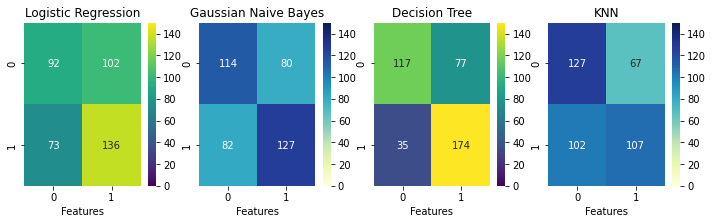

In [ ]:
f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (12,3))
#1. Logistic Regression
LogregCM = confusion_matrix(y_test,log_y_pred)
sns.heatmap(LogregCM, annot = True, fmt = 'd', vmin = 0, vmax = 150,cmap = 'viridis', ax = ax1)
#Annot: the value of the heatmap
#fmt: the decimal point of value of heatmap
#vmin, vmax: the limits of the colorbar
ax1.set_title('Logistic Regression')
ax1.set_xlabel('Features')

#2. Gaussian Naive Bayes
NBCM = confusion_matrix(y_test,NB_y_pred)
sns.heatmap(NBCM, annot = True, fmt = 'd', vmin = 0, vmax = 150, cmap = 'YlGnBu', ax = ax2)
ax2.set_title('Gaussian Naive Bayes')
ax2.set_xlabel('Features')

#3. Decision Tree
DTCM = confusion_matrix(y_test, DT_y_pred)
sns.heatmap(DTCM, annot = True, fmt = 'd', vmin = 0, vmax = 150, cmap = 'viridis', ax = ax3)
ax3.set_title('Decision Tree')
ax3.set_xlabel('Features')


#4. KNN
KNNCM = confusion_matrix(y_test, KNN_y_pred)
sns.heatmap(KNNCM, annot = True, fmt = 'd', vmin = 0 , vmax = 150, cmap = 'YlGnBu', ax = ax4)
ax4.set_title('KNN')
ax4.set_xlabel('Features')


plt.show()

No Likability of Song: ROC AUC=0.500
Logistic (Likability): ROC AUC=0.589


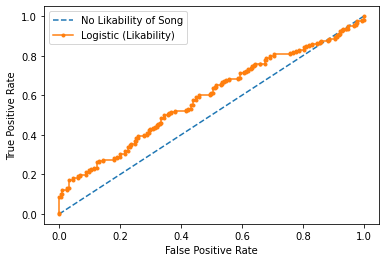

No Likability of Song: ROC AUC=0.500
Gaussian Naive Bayes (Likability): ROC AUC=0.652


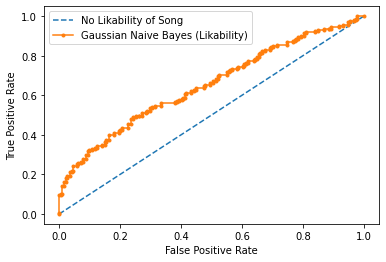

No Likability of Song: ROC AUC=0.500
Decision Tree (Likability): ROC AUC=0.674


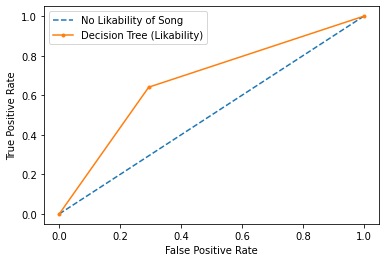

No Likability of Song: ROC AUC=0.500
kNN (Likability): ROC AUC=0.607


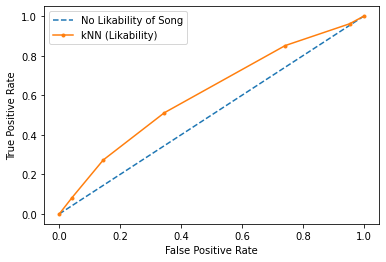

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

X_train = data.drop('target', axis = 1)
Y_train = data['target']

#Split the X_Train & Y_train into training set & testing set by train_test_split function
trainX, testX, trainy, testy = train_test_split(X_train,Y_train,test_size = 0.2, random_state = 0)

# generate a no likability prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Likability of Song: ROC AUC=%.3f' % (ns_auc))
print('Logistic (Likability): ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Likability of Song')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (Likability)')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


#GaussianNB()
model = GaussianNB()
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Likability of Song: ROC AUC=%.3f' % (ns_auc))
print('Gaussian Naive Bayes (Likability): ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Likability of Song')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Gaussian Naive Bayes (Likability)')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#Decision Tree
model = DecisionTreeClassifier()
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Likability of Song: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree (Likability): ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Likability of Song')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree (Likability)')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#kNN
model = KNeighborsClassifier()
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Likability of Song: ROC AUC=%.3f' % (ns_auc))
print('kNN (Likability): ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Likability of Song')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='kNN (Likability)')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

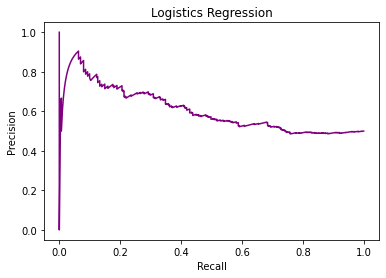

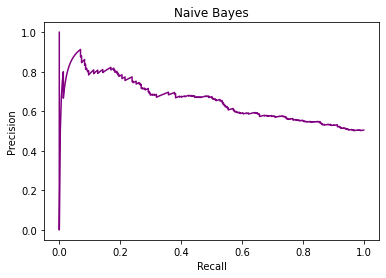

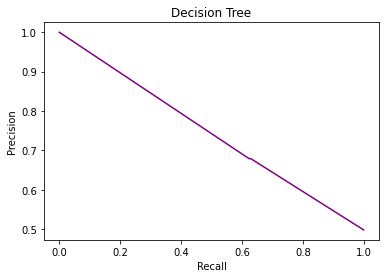

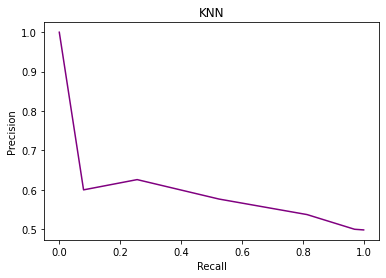

In [ ]:
from sklearn.metrics import precision_recall_curve

X_train = data.drop('target', axis = 1)
Y_train = data['target']
X_train, X_test, y_train, y_test = train_test_split(X_train,Y_train, test_size=.3,random_state=0)

#fit logistic regression model to dataset
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_score = classifier.predict_proba(X_test)[:, 1]
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Logistics Regression')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()


#fit logistic regression model to dataset
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_score = classifier.predict_proba(X_test)[:, 1]
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Naive Bayes')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()


#fit logistic regression model to dataset
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_score = classifier.predict_proba(X_test)[:, 1]
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Decision Tree')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()


#fit logistic regression model to dataset
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

y_score = classifier.predict_proba(X_test)[:, 1]
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('KNN')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()